<a href="https://colab.research.google.com/github/MIARD/SMC/blob/main/SMC_ML_APP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: import python required library for a data analysis
# import time

# import matplotlib.pyplot as plt
# import seaborn as sns
# import plotly.express as px
# import plotly.graph_objects as go

In [2]:
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LogisticRegression
# from sklearn.feature_selection import RFE
# from sklearn.ensemble import VotingClassifier
# from sklearn.ensemble import StackingClassifier
# from sklearn.pipeline import Pipeline
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import LabelEncoder

In [1]:
import joblib
import os
import pandas as pd
import numpy as np
from tabulate import tabulate
from datetime import datetime

In [2]:
# df = pd.read_excel('SSL_T.xlsx')
# df = pd.read_excel('SSL_T_MR.xlsx')
# df = pd.read_excel('SSL_M.xlsx')

# df = pd.read_excel('Train.xlsx')
# df = pd.read_excel('Test.xlsx')
# df = pd.read_excel('Train_Test.xlsx')

pd.set_option('display.max_rows', None)

##Overall Ratio Function

In [17]:
# prompt: change get_feature_data function according to get_precomputed_stats just add code to get feature data so that it add new features as well

def get_feature_data(p_state, index, row):
    # Retrieve stats for individual features
    row_data = {}
    time_15min = row['15Min']
    trade_count_15m, pl_15m, win_rate_15m = precomputed_stats[('15Min', time_15min)]
    row_data['15Min_Trade Count'] = trade_count_15m
    row_data['15Min_Win Rate'] = win_rate_15m
    row_data['15Min_Profit/Loss'] = pl_15m

    hour = row['Hour']
    trade_count_hour, pl_hour, win_rate_hour = precomputed_stats[('Hour', hour)]
    row_data['Hour_Trade Count'] = trade_count_hour
    row_data['Hour_Win Rate'] = win_rate_hour
    row_data['Hour_Profit/Loss'] = pl_hour
    weekday = row['Start_Weekday']
    trade_count_weekday, pl_weekday, win_rate_weekday = precomputed_stats[('Weekday', weekday)]
    row_data['Weekday_Trade Count'] = trade_count_weekday
    row_data['Weekday_Win Rate'] = win_rate_weekday
    row_data['Weekday_Profit/Loss'] = pl_weekday

    month = row['Month']
    trade_count_month, pl_month, win_rate_month = precomputed_stats[('Month', month)]
    row_data['Month_Trade Count'] = trade_count_month
    row_data['Month_Win Rate'] = win_rate_month
    row_data['Month_Profit/Loss'] = pl_month

    criteria = row['Criteria']
    trade_count_criteria, pl_criteria, win_rate_criteria = precomputed_stats[('Criteria', criteria)]
    row_data['Criteria_Trade Count'] = trade_count_criteria
    row_data['Criteria_Win Rate'] = win_rate_criteria
    row_data['Criteria_Profit/Loss'] = pl_criteria

    # Add features for Day of Month and Week of Month
    day_of_month = row['Day_of_Month']
    trade_count_day, pl_day, win_rate_day = precomputed_stats[('Day_of_Month', day_of_month)]
    row_data['Day_of_Month_Trade Count'] = trade_count_day
    row_data['Day_of_Month_Win Rate'] = win_rate_day
    row_data['Day_of_Month_Profit/Loss'] = pl_day

    week_of_month = row['Week_of_Month']
    trade_count_week, pl_week, win_rate_week = precomputed_stats[('Week_of_Month', week_of_month)]
    row_data['Week_of_Month_Trade Count'] = trade_count_week
    row_data['Week_of_Month_Win Rate'] = win_rate_week
    row_data['Week_of_Month_Profit/Loss'] = pl_week

    # Retrieve stats for combined features
    trade_count_weekday_15m, pl_weekday_15m, win_rate_weekday_15m = precomputed_stats[('Weekday_15Min', weekday, time_15min)]
    row_data['Weekday_15Min_Trade Count'] = trade_count_weekday_15m
    row_data['Weekday_15Min_Win Rate'] = win_rate_weekday_15m
    row_data['Weekday_15Min_Profit/Loss'] = pl_weekday_15m

    trade_count_weekday_hour, pl_weekday_hour, win_rate_weekday_hour = precomputed_stats[('Weekday_Hour', weekday, hour)]
    row_data['Weekday_Hour_Trade Count'] = trade_count_weekday_hour
    row_data['Weekday_Hour_Win Rate'] = win_rate_weekday_hour
    row_data['Weekday_Hour_Profit/Loss'] = pl_weekday_hour

    trade_count_weekday_month, pl_weekday_month, win_rate_weekday_month = precomputed_stats[('Weekday_Month', weekday, month)]
    row_data['Weekday_Month_Trade Count'] = trade_count_weekday_month
    row_data['Weekday_Month_Win Rate'] = win_rate_weekday_month
    row_data['Weekday_Month_Profit/Loss'] = pl_weekday_month

    trade_count_criteria_15m, pl_criteria_15m, win_rate_criteria_15m = precomputed_stats[('Criteria_15Min', criteria, time_15min)]
    row_data['Criteria_15Min_Trade Count'] = trade_count_criteria_15m
    row_data['Criteria_15Min_Win Rate'] = win_rate_criteria_15m
    row_data['Criteria_15Min_Profit/Loss'] = pl_criteria_15m

    trade_count_criteria_hour, pl_criteria_hour, win_rate_criteria_hour = precomputed_stats[('Criteria_Hour', criteria, hour)]
    row_data['Criteria_Hour_Trade Count'] = trade_count_criteria_hour
    row_data['Criteria_Hour_Win Rate'] = win_rate_criteria_hour
    row_data['Criteria_Hour_Profit/Loss'] = pl_criteria_hour

    trade_count_criteria_weekday, pl_criteria_weekday, win_rate_criteria_weekday = precomputed_stats[('Criteria_Weekday', criteria, weekday)]
    row_data['Criteria_Weekday_Trade Count'] = trade_count_criteria_weekday
    row_data['Criteria_Weekday_Win Rate'] = win_rate_criteria_weekday
    row_data['Criteria_Weekday_Profit/Loss'] = pl_criteria_weekday

    trade_count_criteria_month, pl_criteria_month, win_rate_criteria_month = precomputed_stats[('Criteria_Month', criteria, month)]
    row_data['Criteria_Month_Trade Count'] = trade_count_criteria_month
    row_data['Criteria_Month_Win Rate'] = win_rate_criteria_month
    row_data['Criteria_Month_Profit/Loss'] = pl_criteria_month

    trade_count_hour_month, pl_hour_month, win_rate_hour_month = precomputed_stats[('Hour_Month', hour, month)]
    row_data['Hour_Month_Trade Count'] = trade_count_hour_month
    row_data['Hour_Month_Win Rate'] = win_rate_hour_month
    row_data['Hour_Month_Profit/Loss'] = pl_hour_month

    trade_count_15min_month, pl_15min_month, win_rate_15min_month = precomputed_stats[('15Min_Month', time_15min, month)]
    row_data['15Min_Month_Trade Count'] = trade_count_15min_month
    row_data['15Min_Month_Win Rate'] = win_rate_15min_month
    row_data['15Min_Month_Profit/Loss'] = pl_15min_month

    # Add combined features for Day of Month and Week of Month
    trade_count_weekday_day, pl_weekday_day, win_rate_weekday_day = precomputed_stats[('Weekday_Day', weekday, day_of_month)]
    row_data['Weekday_Day_Trade Count'] = trade_count_weekday_day
    row_data['Weekday_Day_Win Rate'] = win_rate_weekday_day
    row_data['Weekday_Day_Profit/Loss'] = pl_weekday_day

    trade_count_weekday_week, pl_weekday_week, win_rate_weekday_week = precomputed_stats[('Weekday_Week', weekday, week_of_month)]
    row_data['Weekday_Week_Trade Count'] = trade_count_weekday_week
    row_data['Weekday_Week_Win Rate'] = win_rate_weekday_week
    row_data['Weekday_Week_Profit/Loss'] = pl_weekday_week

    trade_count_criteria_day, pl_criteria_day, win_rate_criteria_day = precomputed_stats[('Criteria_Day', criteria, day_of_month)]
    row_data['Criteria_Day_Trade Count'] = trade_count_criteria_day
    row_data['Criteria_Day_Win Rate'] = win_rate_criteria_day
    row_data['Criteria_Day_Profit/Loss'] = pl_criteria_day

    trade_count_criteria_week, pl_criteria_week, win_rate_criteria_week = precomputed_stats[('Criteria_Week', criteria, week_of_month)]
    row_data['Criteria_Week_Trade Count'] = trade_count_criteria_week
    row_data['Criteria_Week_Win Rate'] = win_rate_criteria_week
    row_data['Criteria_Week_Profit/Loss'] = pl_criteria_week

    trade_count_hour_day, pl_hour_day, win_rate_hour_day = precomputed_stats[('Hour_Day', hour, day_of_month)]
    row_data['Hour_Day_Trade Count'] = trade_count_hour_day
    row_data['Hour_Day_Win Rate'] = win_rate_hour_day
    row_data['Hour_Day_Profit/Loss'] = pl_hour_day

    trade_count_hour_week, pl_hour_week, win_rate_hour_week = precomputed_stats[('Hour_Week', hour, week_of_month)]
    row_data['Hour_Week_Trade Count'] = trade_count_hour_week
    row_data['Hour_Week_Win Rate'] = win_rate_hour_week
    row_data['Hour_Week_Profit/Loss'] = pl_hour_week

    trade_count_15min_day, pl_15min_day, win_rate_15min_day = precomputed_stats[('15Min_Day', time_15min, day_of_month)]
    row_data['15Min_Day_Trade Count'] = trade_count_15min_day
    row_data['15Min_Day_Win Rate'] = win_rate_15min_day
    row_data['15Min_Day_Profit/Loss'] = pl_15min_day

    trade_count_15min_week, pl_15min_week, win_rate_15min_week = precomputed_stats[('15Min_Week', time_15min, week_of_month)]
    row_data['15Min_Week_Trade Count'] = trade_count_15min_week
    row_data['15Min_Week_Win Rate'] = win_rate_15min_week
    row_data['15Min_Week_Profit/Loss'] = pl_15min_week

    trade_count_month_day, pl_month_day, win_rate_month_day = precomputed_stats[('Month_Day', month, day_of_month)]
    row_data['Month_Day_Trade Count'] = trade_count_month_day
    row_data['Month_Day_Win Rate'] = win_rate_month_day
    row_data['Month_Day_Profit/Loss'] = pl_month_day

    trade_count_month_week, pl_month_week, win_rate_month_week = precomputed_stats[('Month_Week', month, week_of_month)]
    row_data['Month_Week_Trade Count'] = trade_count_month_week
    row_data['Month_Week_Win Rate'] = win_rate_month_week
    row_data['Month_Week_Profit/Loss'] = pl_month_week

    trade_count_day_week, pl_day_week, win_rate_day_week = precomputed_stats[('Day_Week', day_of_month, week_of_month)]
    row_data['Day_Week_Trade Count'] = trade_count_day_week
    row_data['Day_Week_Win Rate'] = win_rate_day_week
    row_data['Day_Week_Profit/Loss'] = pl_day_week

    return row_data


In [18]:
def show_model_result(model_name, accuracy, class_report):
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(class_report)

##Get Train Data From Input

In [19]:
# prompt: get_train_data_for_input(df, time_input, date_input, criteria_input): instead of this get_train_data_for_input_optimized(precompute_stats, time_input, date_input, criteria_input) so that it can take data from precompute state instead of df

def get_train_data_for_input(precomputed_stats, time_input, date_input, criteria_input, training_feature_cols=[]):

    # Convert inputs
    try:
        input_time = datetime.strptime(time_input, '%H:%M').time()
    except ValueError:
        print("Invalid time format. Use HH:MM.")
        return pd.DataFrame()

    try:
        input_date = datetime.strptime(date_input, '%m/%d/%Y')
    except ValueError:
        print("Invalid date format. Use M/D/YYYY.")
        return pd.DataFrame()

    row_data = {}
    input_datetime = datetime.combine(input_date, input_time)

    time_15min = input_datetime.strftime('%H:%M')
    hour = input_datetime.hour
    weekday = input_datetime.strftime('%A')
    month = input_datetime.strftime('%B')
    criteria = criteria_input
    day_of_month = input_datetime.day
    week_of_month = (input_datetime.day - 1) // 7 + 1

    # Retrieve stats from precomputed_stats dictionary
    try:
        row = {'15Min': time_15min, 'Hour': hour, 'Start_Weekday': weekday, 'Month': month, 'Criteria': criteria, 'Day_of_Month':day_of_month, 'Week_of_Month':week_of_month}
        row_data = get_feature_data(precomputed_stats, 0, row)

    except KeyError as e:
        print(f"Error: Missing precomputed statistic for key {e}. Ensure create_precomputed_stats covers all combinations you need.")
        return pd.DataFrame()


    # Create DataFrame from the calculated row_data
    input_features_df = pd.DataFrame([row_data])
    # Reindex the input_features_df to match the training columns, filling missing with 0
    input_features_df = input_features_df.reindex(columns=training_feature_cols, fill_value=0)

    # Convert all columns to the same data type as the training features (assuming int from previous steps)
    for col in input_features_df.columns:
        try:
             input_features_df[col] = pd.to_numeric(input_features_df[col], errors='coerce')
             input_features_df[col] = input_features_df[col].fillna(0).astype(int)
        except ValueError:
            print(f"Warning: Could not convert input column '{col}' to integer.")


    return input_features_df

# Example usage (assuming X_train is defined from the previous code):
# Get the column names from your training features DataFrame

# Call the optimized function
# input_data = get_train_data_for_input_optimized(precomputed_stats, '09:30', '01/8/2023', 'ELC', training_feature_cols)
# print(input_data)


##Show Prediciton

In [20]:
# --- Prediction using the trained model ---
def predict_trade_result(model, input_features_df):
    """
    Predicts the result of a trade based on the input features using the trained model.

    Args:
        model: The trained machine learning model.
        input_features_df (pd.DataFrame): A DataFrame with one row containing
                                          the features for prediction, matching
                                          the format of the training features.

    Returns:
        int: The predicted class (e.g., 1 for Win, 0 for Loss).
        float: The predicted probability of the positive class (Win).
    """
    if input_features_df.empty:
        print("Cannot predict: Invalid input features.")
        return None, None

    # Make prediction
    predicted_class = model.predict(input_features_df)[0]
    if predicted_class == 0:
        predicted_proba = model.predict_proba(input_features_df)
    else:
        predicted_proba = model.predict_proba(input_features_df)

    return predicted_class, predicted_proba

In [42]:
  # pip install tabulate if needed

def show_predictions(time_input, date_input, criteria_input, CW, CL, training_feature_cols, model_names, model_keys,b_models=None, m_models=None, b_acc=None, m_acc=None, Max_R=False, w_threshold=1):
    mr = "_max_r" if Max_R else ""
    # Initialize models and their keys
    binary_models = b_models if b_models is not None else [globals()[f"{k}_model{mr}"] for k in model_keys]
    binary_accuracies = b_acc if b_acc is not None else [globals()[f"{k}_accuracy{mr}"] for k in model_keys]

    multiclass_models = m_models if m_models is not None else [globals()[f"{k}_model_m{mr}"] for k in model_keys]
    multiclass_accuracies = m_acc if m_acc is not None else [globals()[f"{k}_accuracy_m{mr}"] for k in model_keys]

    input_features = get_train_data_for_input(precomputed_stats, time_input, date_input, criteria_input, training_feature_cols)
    input_features['CL'] = [CL]
    input_features['CW'] = [CW]
    predictions = []
    predictions_multi = []
    if not input_features.empty:
        table_data = []

        for i, name in enumerate(model_names):
            # Predict binary
            pred_bin, prob_bin = predict_trade_result(binary_models[i], input_features)
            label_bin = 'Win' if pred_bin == 1 else 'Loss'
            acc_bin = f"{binary_accuracies[i]:.2f}"
            bin_str = f"{label_bin} ({np.max(prob_bin):.2f}), Acc: {acc_bin}"

            # Predict multiclass
            pred_multi, prob_multi = predict_trade_result(multiclass_models[i], input_features)
            acc_multi = f"{multiclass_accuracies[i]:.2f}"
            multi_str = f"Class {label_encoder.inverse_transform([pred_multi])[0]} ({np.max(prob_multi):.2f}), Acc: {acc_multi}"
            table_data.append([name, bin_str, multi_str])
            predictions.append(pred_bin)
            predictions_multi.append(pred_multi)
        predicted_win = predictions.count(1)
        predicted_loss = predictions.count(0)
        predicted_win_multi = len(predictions)-predictions_multi.count(0)
        predicted_loss_multi = predictions_multi.count(0)
        trade_decision = "Win" if predicted_win > w_threshold else "Loss"
        trade_decision_multi = "Win" if predicted_win_multi >= w_threshold else "Loss"
        max_r = "" if trade_decision_multi == "Loss" else "- Max R: "+str(np.max(predictions_multi))
        avg_r = "" if trade_decision_multi == "Loss" else "- Average R:"+str(np.mean([x for x in predictions_multi if x>0]))
        # Display table
        print(f"\n--- 📊 Combined Model Predictions for {date_input} {time_input} ({criteria_input}) -{mr} ---\n")
        print(f"Overall decision: ---- Binary: ** {trade_decision} **  Multi: ** {trade_decision_multi}** ---- {max_r} {avg_r}")
        print(f"Binary Models: Win Predicted **{predicted_win} time **    Multi Models: Win Predicted **{predicted_win_multi}**")
        print(tabulate(table_data, headers=["Model", "📘 Binary (Win/Loss)", "📗 Multi-Class (R Bucket)"], tablefmt="fancy_grid"))
        return predictions, predictions_multi

    else:
        print("❌ Prediction could not be made due to invalid inputs or data.")


#Read Require Data

##Read Models

##Read From Drive

In [12]:
# # Mount Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

In [13]:
# # prompt: remove SMC directory from my files
# %cd /content/
# !rm -rf SMC/

In [14]:
# Copy SMC folder from Drive to current working directory (optional)
# !cp -r /content/drive/MyDrive/SMC /content/
# %cd /content/SMC

# !ls

##Read From Git

In [15]:
# Clone the GitHub repository
!git clone https://github.com/MIARD/SMC.git

# Move into the cloned directory
%cd SMC

# List files to confirm
!ls

Cloning into 'SMC'...
remote: Enumerating objects: 98, done.
remote: Counting objects: 100% (98/98), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 98 (delta 63), reused 82 (delta 52), pack-reused 0 (from 0)
Receiving objects: 100% (98/98), 30.60 MiB | 25.37 MiB/s, done.
Resolving deltas: 100% (63/63), done.
/content/SMC
cmd_arg.txt		       smc_data_analysis.py
Get_EMA.ipynb		       SMC_ML_APP.ipynb
get-pip.py		       smc_ml_app.py
max_r_model_accuracies.xlsx    SMC_ML.ipynb
precomputed_stats.pkl	       smc_ml.py
README.md		       SSL_T_MR.xlsx
regular_model_accuracies.xlsx  SSL_T.xlsx
saved_models		       training_feature_cols.pkl
SMC_Data_Analysis.ipynb


##Read info

In [22]:
# prompt: read both accuracies from save xlxs and show their tables

# Read the saved accuracy dataframes
try:
  precomputed_stats = joblib.load('precomputed_stats.pkl')
  training_feature_cols = joblib.load('training_feature_cols.pkl')
  regular_accuracies = pd.read_excel("regular_model_accuracies.xlsx")
  max_r_accuracies = pd.read_excel("max_r_model_accuracies.xlsx")

  print("\n--- Regular Model Accuracies ---")
  print(tabulate(regular_accuracies, headers='keys', tablefmt='psql'))

  print("\n--- Max R Model Accuracies ---")
  print(tabulate(max_r_accuracies, headers='keys', tablefmt='psql'))

except FileNotFoundError:
  print("Accuracy files not found. Please run the model training section first.")
except Exception as e:
  print(f"An error occurred while reading the accuracy files: {e}")


--- Regular Model Accuracies ---
+----+---------------------+-------------------+-----------------------------------+
|    | Model               |   Binary Accuracy |   Multi-Class (R Bucket) Accuracy |
|----+---------------------+-------------------+-----------------------------------|
|  0 | RandomForest        |          0.960912 |                          0.86645  |
|  1 | XGBoost             |          0.960912 |                          0.885993 |
|  2 | Logistic Regression |          0.973941 |                          0.859935 |
|  3 | Voting Classifier   |          0.967427 |                          0.882736 |
|  4 | Stacking Classifier |          0.964169 |                          0.856678 |
+----+---------------------+-------------------+-----------------------------------+

--- Max R Model Accuracies ---
+----+---------------------------+-------------------+-----------------------------------+
|    | Model                     |   Binary Accuracy |   Multi-Class (R Bucket

##Loading Models

In [23]:
# prompt: read all 20 models separately  regular binary, regular multi, max r binary, max r multi, . so that i can pass binary model and multi models list to function easily

# Define a directory to save the models
model_dir = 'saved_models'

# Define lists to store the loaded models
regular_binary_models = []
regular_multi_models = []
max_r_binary_models = []
max_r_multi_models = []

# List of model base names (keys used in filenames)
model_keys = ['RF', 'XVG', 'LR', 'VC', 'S']

# Load regular binary models
print("Loading regular binary models...")
for key in model_keys:
    filename = os.path.join(model_dir, f'{key}_model.pkl')
    try:
        model = joblib.load(filename)
        regular_binary_models.append(model)
        print(f"Loaded {key}_model")
    except FileNotFoundError:
        print(f"Error: {key}_model.pkl not found. Please run the saving section first.")
    except Exception as e:
        print(f"Error loading {key}_model: {e}")

# Load regular multi-class models
print("\nLoading regular multi-class models...")
for key in model_keys:
    filename = os.path.join(model_dir, f'{key}_model_m.pkl')
    try:
        model = joblib.load(filename)
        regular_multi_models.append(model)
        print(f"Loaded {key}_model_m")
    except FileNotFoundError:
        print(f"Error: {key}_model_m.pkl not found. Please run the saving section first.")
    except Exception as e:
        print(f"Error loading {key}_model_m: {e}")

# Load max R binary models
print("\nLoading Max R binary models...")
for key in model_keys:
    filename = os.path.join(model_dir, f'{key}_model_max_r.pkl')
    try:
        model = joblib.load(filename)
        max_r_binary_models.append(model)
        print(f"Loaded {key}_model_max_r")
    except FileNotFoundError:
        print(f"Error: {key}_model_max_r.pkl not found. Please run the saving section first.")
    except Exception as e:
        print(f"Error loading {key}_model_max_r: {e}")

# Load max R multi-class models
print("\nLoading Max R multi-class models...")
for key in model_keys:
    filename = os.path.join(model_dir, f'{key}_model_m_max_r.pkl')
    try:
        model = joblib.load(filename)
        max_r_multi_models.append(model)
        print(f"Loaded {key}_model_m_max_r")
    except FileNotFoundError:
        print(f"Error: {key}_model_m_max_r.pkl not found. Please run the saving section first.")
    except Exception as e:
        print(f"Error loading {key}_model_m_max_r: {e}")

# Load Label Encoders
print("\nLoading Label Encoders...")
try:
    label_encoder = joblib.load(os.path.join(model_dir, 'label_encoder.pkl'))
    print("Loaded label_encoder")
except FileNotFoundError:
    print("Error: label_encoder.pkl not found.")
except Exception as e:
    print(f"Error loading label_encoder: {e}")

try:
    label_encoder_max_r = joblib.load(os.path.join(model_dir, 'label_encoder_max_r.pkl'))
    print("Loaded label_encoder_max_r")
except FileNotFoundError:
    print("Error: label_encoder_max_r.pkl not found.")
except Exception as e:
    print(f"Error loading label_encoder_max_r: {e}")


# Now you have the models loaded into these lists:
# regular_binary_models
# regular_multi_models
# max_r_binary_models
# max_r_multi_models

# You can pass these lists to other functions as needed.
# For example, you could create a function that takes a list of models and a dataframe
# and performs predictions or evaluation.


Loading regular binary models...
Loaded RF_model
Loaded XVG_model
Loaded LR_model
Loaded VC_model
Loaded S_model

Loading regular multi-class models...
Loaded RF_model_m
Loaded XVG_model_m
Loaded LR_model_m
Loaded VC_model_m
Loaded S_model_m

Loading Max R binary models...
Loaded RF_model_max_r
Loaded XVG_model_max_r
Loaded LR_model_max_r
Loaded VC_model_max_r
Loaded S_model_max_r

Loading Max R multi-class models...
Loaded RF_model_m_max_r
Loaded XVG_model_m_max_r
Loaded LR_model_m_max_r
Loaded VC_model_m_max_r
Loaded S_model_m_max_r

Loading Label Encoders...
Loaded label_encoder
Loaded label_encoder_max_r


##Prediction App

In [44]:
time_input = "14:00"  #@param {type:"string"}
date_input = "6/30/2025"  #@param {type:"string"}
criteria_input = "ELC"  #@param {type:"string"}
CW = 0 #@param {type:"integer"}
CL = 6 #@param {type:"integer"}

model_names = ['Random Forest', 'XGBoost', 'Logistic Regression', 'Voting Classifier', 'Stacking Classifier']
model_names_max_r = ['Random Forest', 'XGBoost', 'Logistic Regression', 'Voting Classifier', 'Stacking Classifier']
model_keys = ['RF', 'XVG', 'LR', 'VC', 'S']

show_predictions(time_input, date_input, criteria_input, CW, CL,training_feature_cols, model_names, model_keys, b_models=regular_binary_models, m_models=regular_multi_models, b_acc=regular_accuracies['Binary Accuracy'], m_acc=regular_accuracies['Multi-Class (R Bucket) Accuracy'], 
                 w_threshold=1)



show_predictions(time_input, date_input, criteria_input, CW, CL,training_feature_cols, model_names_max_r, model_keys, b_models=max_r_binary_models, m_models=max_r_multi_models, b_acc=max_r_accuracies['Binary Accuracy'], m_acc=max_r_accuracies['Multi-Class (R Bucket) Accuracy'], 
                 Max_R=True, w_threshold=1)
# List of predictions from the trained models




--- 📊 Combined Model Predictions for 6/30/2025 14:00 (ELC) - ---

Overall decision: ---- Binary: ** Loss **  Multi: ** Win** ---- - Max R: 2 - Average R:1.5
Binary Models: Win Predicted **1 time **    Multi Models: Win Predicted **2**
╒═════════════════════╤════════════════════════╤═════════════════════════════╕
│ Model               │ 📘 Binary (Win/Loss)   │ 📗 Multi-Class (R Bucket)   │
╞═════════════════════╪════════════════════════╪═════════════════════════════╡
│ Random Forest       │ Loss (0.65), Acc: 0.96 │ Class 1 (0.54), Acc: 0.87   │
├─────────────────────┼────────────────────────┼─────────────────────────────┤
│ XGBoost             │ Loss (1.00), Acc: 0.96 │ Class 1 (0.99), Acc: 0.89   │
├─────────────────────┼────────────────────────┼─────────────────────────────┤
│ Logistic Regression │ Loss (0.71), Acc: 0.97 │ Class 2 (0.57), Acc: 0.86   │
├─────────────────────┼────────────────────────┼─────────────────────────────┤
│ Voting Classifier   │ Loss (0.79), Acc: 0.97 │ Class 

([np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(1)],
 [np.int64(0), np.int32(0), np.int64(4), np.int64(0), np.int64(1)])

##Predict with Excel File

In [25]:
def calculate_prior_streaks(df):
    cl_list = [3]  # First trade starts with CL = 3
    cw_list = [0]  # First trade starts with CW = 0

    for i in range(1, len(df)):
        prev_result = df.loc[i - 1, 'Result']
        prev_cl = cl_list[-1]
        prev_cw = cw_list[-1]

        if prev_result == 'W':
            cw = prev_cw + 1
            cl = 0
        elif prev_result == 'L':
            cl = prev_cl + 1
            cw = 0
        else:
            cl = prev_cl
            cw = prev_cw

        cl_list.append(cl)
        cw_list.append(cw)

    df['CL'] = cl_list
    df['CW'] = cw_list
    return df

# Example usage:
# df = calculate_prior_streaks(df)

In [32]:

# Modify process_excel_and_predict to collect predictions and create a summary DataFrame
def process_excel_and_predict(file_path, from_index, to_index, w_threshold = 1, s_print=False):
    """
    Reads an Excel file, calculates prior streaks (CL and CW),
    makes predictions for a specified range of rows, and returns
    a summary DataFrame of predictions.

    Args:
        file_path (str): The path to the Excel file.
        from_index (int): The starting index (row number) to process.
        to_index (int): The ending index (row number) to process.

    Returns:
        pd.DataFrame: A DataFrame summarizing the predictions for each processed row.
    """
    try:
        df = pd.read_excel(file_path)
        print(f"Successfully read Excel file: {file_path}")
    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
        return None
    except Exception as e:
        print(f"Error reading Excel file: {e}")
        return None

    # Ensure 'Result' column exists for streak calculation
    if 'Result' not in df.columns:
        print("Error: 'Result' column not found in the Excel file. Cannot calculate streaks.")
        return None

    # Calculate prior streaks (CL and CW)
    df = calculate_prior_streaks(df)
    print("Calculated CL and CW columns.")

    # Ensure 'Start_Time' and 'Start_Date' columns exist and are datetime objects
    if 'Start Time' not in df.columns or 'Start Date' not in df.columns:
         print("Error: 'Start Time' or 'Start Date' column not found in the Excel file. Cannot process dates.")
         return None

    # Combine 'Start_Date' and 'Start_Time' and convert to datetime objects
    try:
        df['Start_Datetime'] = pd.to_datetime(df['Start Date'].astype(str) + ' ' + df['Start Time'].astype(str))
        print("Created 'Start_Datetime' column.")
    except Exception as e:
        print(f"Error combining date and time or converting to datetime: {e}")
        return None

    # Check if the requested range is valid
    if from_index < 0 or to_index >= len(df) or from_index > to_index:
        print(f"Error: Invalid index range. Data has {len(df)} rows (0 to {len(df)-1}).")
        return None

    print(f"\n--- Processing rows from index {from_index} to {to_index} ---")

    summary_data = []

    # Process rows one by one
    for i in range(from_index, to_index + 1):
        row = df.loc[i]

        time_input = row['Start_Datetime'].strftime('%H:%M')
        date_input = row['Start_Datetime'].strftime('%m/%d/%Y')
        criteria_input = row['Criteria']  # Assuming 'Criteria' column exists
        cw_value = row['CW']
        cl_value = row['CL']
        actual_result = row['Result'] # Get the actual result

        print(f"\n--- Predicting for Row Index: {i} ---")
        print(f"Date: {date_input}, Time: {time_input}, Criteria: {criteria_input}, Prior CL: {cl_value}, Prior CW: {cw_value}")

        # Make predictions using the existing show_predictions function
        # Ensure precomputed_stats, training_feature_cols, models, and encoders are loaded globally or passed
        try:
            # Get predictions for regular models
            predictions_reg_bin, predictions_reg_multi = show_predictions(
                time_input,
                date_input,
                criteria_input,
                cw_value,
                cl_value,
                training_feature_cols,
                model_names,
                model_keys,
                b_models=regular_binary_models,
                m_models=regular_multi_models,
                b_acc=regular_accuracies['Binary Accuracy'],
                m_acc=regular_accuracies['Multi-Class (R Bucket) Accuracy']
            )

            # Get predictions for max R models
            predictions_max_r_bin, predictions_max_r_multi = show_predictions(
                time_input,
                date_input,
                criteria_input,
                cw_value,
                cl_value,
                training_feature_cols,
                model_names_max_r,
                model_keys,
                b_models=max_r_binary_models,
                m_models=max_r_multi_models,
                b_acc=max_r_accuracies['Binary Accuracy'],
                m_acc=max_r_accuracies['Multi-Class (R Bucket) Accuracy'],
                Max_R=True
            )

            if predictions_reg_bin is not None and predictions_reg_multi is not None and \
               predictions_max_r_bin is not None and predictions_max_r_multi is not None:

                row_summary = {
                    'Index': i+1,
                    'Date': date_input,
                    'Time': time_input,
                    'Criteria': criteria_input,
                    'CL': cl_value,
                    'CW': cw_value,
                    'Actual_Result': actual_result
                }

                # # Add individual model binary predictions
                # for j, name in enumerate(model_names):
                #     row_summary[f'{name}_Binary_Pred'] = predictions_reg_bin[j]

                # # Add individual model multi-class predictions (Regular)
                # for j, name in enumerate(model_names):
                #      # Use inverse_transform to get the original class label
                #      row_summary[f'{name}_Multi_Pred'] = label_encoder.inverse_transform([predictions_reg_multi[j]])[0]

                # # Add individual model multi-class predictions (Max R)
                # for j, name in enumerate(model_names_max_r):
                #      # Use inverse_transform for max R multi-class predictions
                #      row_summary[f'{name}_MaxR_Multi_Pred'] = label_encoder_max_r.inverse_transform([predictions_max_r_multi[j]])[0]

                row_summary['Binary_Pred'] = predictions_reg_bin
                row_summary['Multi_Pred'] = predictions_reg_multi
                row_summary['MaxR_Binary_Pred'] = predictions_max_r_bin
                row_summary['MaxR_Multi_Pred'] = predictions_max_r_multi


                # Add combined binary prediction (Regular)
                predicted_win_reg_bin = predictions_reg_bin.count(1)
                trade_decision_reg_bin = "Win" if predicted_win_reg_bin > w_threshold else "Loss"
                row_summary['Regular_Combined_Binary_Decision'] = trade_decision_reg_bin
                row_summary['Regular_Win_Count_Binary'] = predicted_win_reg_bin

                # Add combined multi-class prediction (Regular)
                predicted_win_reg_multi = len(predictions_reg_multi)-predictions_reg_multi.count(0)
                trade_decision_reg_multi = "Win" if predicted_win_reg_multi >= w_threshold else "Loss"
                row_summary['Regular_Combined_Multi_Decision'] = trade_decision_reg_multi
                row_summary['Regular_Win_Count_Multi'] = predicted_win_reg_multi
                if trade_decision_reg_multi == "Win":
                    row_summary['Regular_Max_R'] = np.max(predictions_reg_multi)
                    row_summary['Regular_Avg_R'] = np.mean([x for x in predictions_reg_multi if x > 0])
                else:
                    row_summary['Regular_Max_R'] = 0
                    row_summary['Regular_Avg_R'] = 0

                # Add combined multi-class prediction (Max R)
                predicted_win_max_r_multi = len(predictions_max_r_multi)-predictions_max_r_multi.count(0)
                trade_decision_max_r_multi = "Win" if predicted_win_max_r_multi >= w_threshold else "Loss"
                row_summary['MaxR_Combined_Multi_Decision'] = trade_decision_max_r_multi
                row_summary['MaxR_Win_Count_Multi'] = predicted_win_max_r_multi
                if trade_decision_max_r_multi == "Win":
                    row_summary['MaxR_Max_R'] = np.max(predictions_max_r_multi)
                    row_summary['MaxR_Avg_R'] = np.mean([x for x in predictions_max_r_multi if x > 0])
                else:
                    row_summary['MaxR_Max_R'] = 0
                    row_summary['MaxR_Avg_R'] = 0


                summary_data.append(row_summary)

        except Exception as e:
             print(f"An error occurred during prediction for index {i}: {e}")
             # Append a row indicating an error if needed
             error_row = {'Index': i, 'Date': date_input, 'Time': time_input, 'Criteria': criteria_input,
                          'CL': cl_value, 'CW': cw_value, 'Actual_Result': actual_result, 'Error': str(e)}
             summary_data.append(error_row)


    # Create DataFrame from the collected summary data
    summary_df = pd.DataFrame(summary_data)

    # Optional: Reorder columns if desired
    # cols = ['Index', 'Date', 'Time', 'Criteria', 'CL', 'CW', 'Actual_Result'] + [col for col in summary_df.columns if col not in ['Index', 'Date', 'Time', 'Criteria', 'CL', 'CW', 'Actual_Result']]
    # summary_df = summary_df[cols]

    return summary_df

# --- User Inputs ---
excel_file_path = 'SSL_T.xlsx'  # Replace with the path to your Excel file
start_index = 3062 # Replace with the starting row index (0-based)
end_index = 3068   # Replace with the ending row index (inclusive)

prediction_summary_df = process_excel_and_predict(excel_file_path, start_index-1, end_index-1)



Successfully read Excel file: SSL_T.xlsx
Calculated CL and CW columns.
Created 'Start_Datetime' column.

--- Processing rows from index 3061 to 3067 ---

--- Predicting for Row Index: 3061 ---
Date: 06/29/2025, Time: 21:15, Criteria: LG SBPS, Prior CL: 5, Prior CW: 0

--- 📊 Combined Model Predictions for 06/29/2025 21:15 (LG SBPS) - ---

Overall decision: ---- Binary: ** Win **  Multi: ** Win** ---- - Max R: 4 - Average R:1.8
Binary Models: Win Predicted **5 time **    Multi Models: Win Predicted **5**
╒═════════════════════╤════════════════════════╤═════════════════════════════╕
│ Model               │ 📘 Binary (Win/Loss)   │ 📗 Multi-Class (R Bucket)   │
╞═════════════════════╪════════════════════════╪═════════════════════════════╡
│ Random Forest       │ Win (0.59), Acc: 0.96  │ Class 3 (0.35), Acc: 0.87   │
├─────────────────────┼────────────────────────┼─────────────────────────────┤
│ XGBoost             │ Win (0.97), Acc: 0.96  │ Class 5 (0.85), Acc: 0.89   │
├───────────────────

In [33]:
prediction_summary_df

,Index,Date,Time,Criteria,CL,CW,Actual_Result,Binary_Pred,Multi_Pred,MaxR_Binary_Pred,...,Regular_Combined_Binary_Decision,Regular_Win_Count_Binary,Regular_Combined_Multi_Decision,Regular_Win_Count_Multi,Regular_Max_R,Regular_Avg_R,MaxR_Combined_Multi_Decision,MaxR_Win_Count_Multi,MaxR_Max_R,MaxR_Avg_R
0,3062,06/29/2025,21:15,LG SBPS,5,0,W,"[1, 1, 1, 1, 1]","[2, 4, 1, 1, 1]","[1, 1, 1, 1, 1]",...,Win,5,Win,5,4,1.8,Win,5,6,4.6
1,3063,06/30/2025,02:45,LG C,0,1,L,"[0, 0, 0, 0, 0]","[0, 0, 0, 0, 2]","[0, 0, 0, 0, 0]",...,Loss,0,Win,1,2,2.0,Win,1,4,4.0
2,3064,06/30/2025,07:00,LG RGC,1,0,L,"[0, 0, 0, 0, 0]","[0, 0, 0, 0, 2]","[0, 0, 0, 0, 0]",...,Loss,0,Win,1,2,2.0,Win,1,4,4.0
3,3065,06/30/2025,10:30,ELC,2,0,L,"[0, 0, 0, 0, 0]","[0, 0, 0, 0, 2]","[0, 0, 0, 0, 0]",...,Loss,0,Win,1,2,2.0,Win,1,4,4.0
4,3066,06/30/2025,10:45,LG RGC UP,3,0,L,"[0, 0, 1, 0, 1]","[0, 0, 1, 0, 2]","[0, 0, 1, 0, 1]",...,Win,2,Win,2,2,1.5,Win,2,4,4.0
5,3067,06/30/2025,12:15,LG C,4,0,L,"[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]",...,Loss,0,Loss,0,0,0.0,Loss,0,0,0.0
6,3068,06/30/2025,12:45,LG RGC,5,0,L,"[0, 0, 0, 0, 0]","[0, 0, 0, 0, 2]","[0, 0, 0, 0, 0]",...,Loss,0,Win,1,2,2.0,Win,1,4,4.0


In [26]:
df = pd.read_excel(excel_file_path)

Unique Criteria: ['3FC', 'BTWT', 'DLTPS', 'DTLT', 'EL', 'EL HL', 'EL LL', 'EL SBPS', 'EL SPS', 'ELBPS', 'ELC', 'ELCI', 'ELUP', 'ELUPF', 'ELUPR', 'ElC', 'LG BPS', 'LG C', 'LG DTLPS', 'LG EL', 'LG ELC', 'LG IPS', 'LG LH', 'LG LL', 'LG PDH', 'LG PDL', 'LG PMH', 'LG PML', 'LG PS', 'LG PWH', 'LG PWL', 'LG RGC', 'LG RGC UP', 'LG RGC UPF', 'LG RGCR', 'LG SBPS', 'LG SHL', 'LG SLH', 'LG SPS', 'LGG EL', 'LGG PDH', 'LGG PWL', 'LW', 'PDHC', 'PDHC + LG PDH', 'PDLC', 'PDLC + LG PDL', 'PMHC', 'PMLC', 'PWHC', 'PWHC + LG PWH', 'PWLC', 'TPWL', 'UTLT', 'lG RGC']
Unique 15Min: ['00:00', '00:15', '00:30', '00:45', '01:00', '01:15', '01:30', '01:45', '02:00', '02:15', '02:30', '02:45', '03:00', '03:15', '03:30', '03:45', '04:00', '04:15', '04:30', '04:45', '05:00', '05:15', '05:30', '05:45', '06:00', '06:15', '06:30', '06:45', '07:00', '07:15', '07:30', '07:45', '08:00', '08:15', '08:30', '08:45', '09:00', '09:15', '09:30', '09:45', '10:00', '10:15', '10:30', '10:45', '11:00', '11:15', '11:30', '11:45', '12

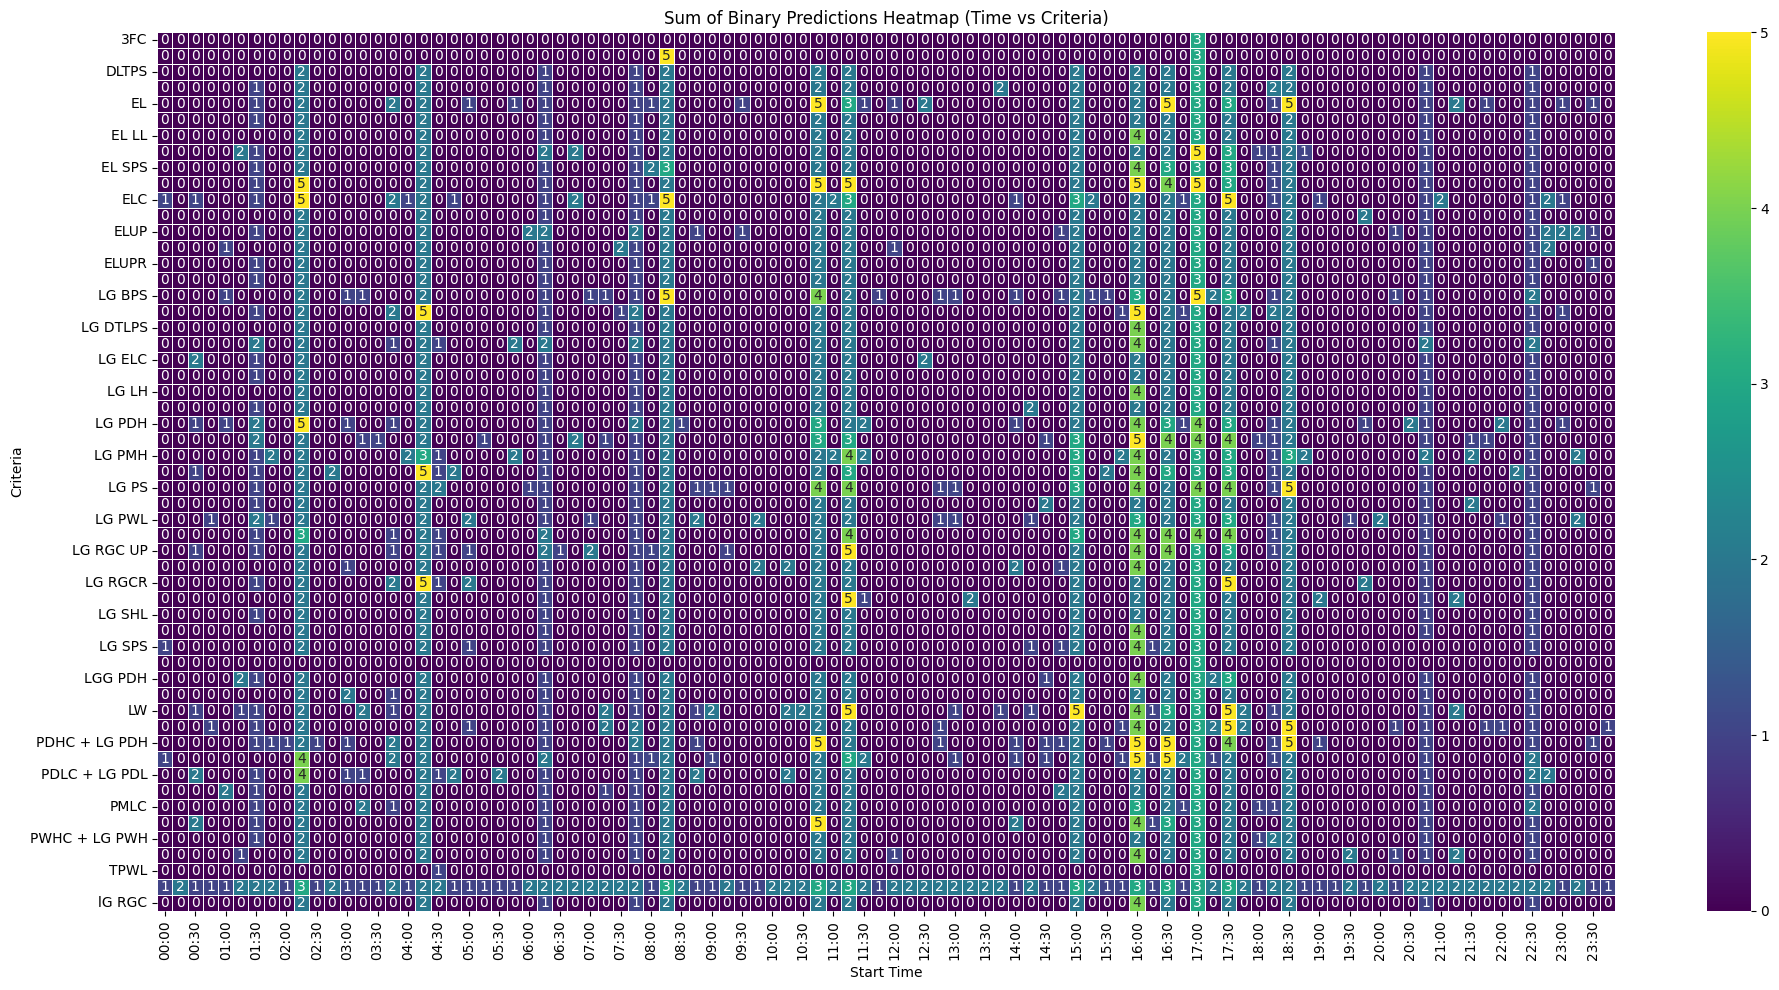

In [ ]:
# prompt:  i have read a df . now Take a input Date ,CW, CL and  then try combination of all criteria  at 'Criteria' Column, and time at 'Start Time' collumn  in df to make predictions and make a show a heat map time in x and criteria in y and value is sum of binary prediction.. do not need multi and binary_mr, binary mult_mr.. just binary prediction sum..for example if df['Crietria'] has unique value ['a', 'b'] and time has ['00:00', 00:15'] the ntry combination [date, '00:00', 'a', CW, CL] , [date, '00:00', 'b', CW, CL]

import matplotlib.pyplot as plt
import seaborn as sns

def predict_for_combinations(date_input, CW, CL, training_feature_cols, regular_binary_models, model_keys, model_names, precomputed_stats):
    """
    Generates predictions for all combinations of unique Criteria and Start Times
    for a given date, CW, and CL.

    Args:
        date_input (str): The input date in M/D/YYYY format.
        CW (int): The input Consecutive Wins.
        CL (int): The input Consecutive Losses.
        training_feature_cols (list): List of training feature column names.
        regular_binary_models (list): List of trained regular binary models.
        model_keys (list): List of keys for the models.
        model_names (list): List of names for the models.
        precomputed_stats (dict): Dictionary of precomputed statistics.

    Returns:
        pd.DataFrame: A DataFrame containing the sum of binary predictions
                      for each combination of Time and Criteria.
    """
    # Get unique Criteria and 15Min time values from the original dataframe
    # Assuming 'Criteria' and '15Min' columns exist in the precomputed_stats keys or the original data source
    # A safer way is to get these from the training data if available, or infer from precomputed_stats keys
    criteria_values = set()
    time_values = set()

    for key in precomputed_stats:
        if key[0] == 'Criteria':
            criteria_values.add(key[1])
        if key[0] == '15Min':
            time_values.add(key[1])

    criteria_values = sorted(list(criteria_values))
    time_values = sorted(list(time_values))
    print(f"Unique Criteria: {criteria_values}")
    print(f"Unique 15Min: {time_values}")


    prediction_results = []
    for time_input in time_values:
        if len(prediction_results) % 1000 == 0:
          print("processsing.........:", time_input)
        for criteria_input in criteria_values:

            input_features = get_train_data_for_input(
                precomputed_stats,
                time_input,
                date_input,
                criteria_input,
                training_feature_cols
            )

            if not input_features.empty:
                input_features['CL'] = CL
                input_features['CW'] = CW

                binary_predictions_sum = 0
                for model in regular_binary_models:
                    pred_bin, _ = predict_trade_result(model, input_features)
                    if pred_bin is not None:
                        binary_predictions_sum += pred_bin

                prediction_results.append({
                    'Time': time_input,
                    'Criteria': criteria_input,
                    'Binary_Prediction_Sum': binary_predictions_sum
                })

    # Create a DataFrame from the results
    predictions_df = pd.DataFrame(prediction_results)

    return predictions_df

def plot_prediction_heatmap(predictions_df):
    """
    Generates a heatmap of the sum of binary predictions.

    Args:
        predictions_df (pd.DataFrame): DataFrame containing 'Time', 'Criteria',
                                      and 'Binary_Prediction_Sum' columns.
    """
    if predictions_df.empty:
        print("No prediction data to plot.")
        return

    # Pivot the DataFrame to create a matrix for the heatmap
    heatmap_data = predictions_df.pivot(index='Criteria', columns='Time', values='Binary_Prediction_Sum')

    # Ensure all time values from the original list are present as columns
    # This is important if some time/criteria combinations didn't appear in the data
    all_times = sorted(predictions_df['Time'].unique())
    heatmap_data = heatmap_data.reindex(columns=all_times)

    num_intervals = len(predictions_df)  # should be 96
    fig_width = num_intervals * 0.5  # each label gets 0.5 inches (adjustable)

    plt.figure(figsize=(fig_width, 12))
    sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='viridis', linewidths=.5)
    plt.title('Sum of Binary Predictions Heatmap (Time vs Criteria)')
    plt.xlabel('Start Time')
    plt.ylabel('Criteria')
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.tight_layout() # Adjust layout to prevent labels from overlapping
    plt.show()

# --- User Inputs for Prediction Combination ---
input_date_comb = "6/30/2025"  #@param {type:"string"}
input_CW_comb = 0 #@param {type:"integer"}
input_CL_comb = 1 #@param {type:"integer"}


# Get predictions for all combinations
prediction_combinations_df = predict_for_combinations(
    input_date_comb,
    input_CW_comb,
    input_CL_comb,
    training_feature_cols,
    regular_binary_models,
    model_keys,
    model_names,
    precomputed_stats
)

# Display the prediction sums
print("\n--- Sum of Binary Predictions for all Time/Criteria Combinations ---")
print(prediction_combinations_df.head()) # Show first few rows

# Generate and display the heatmap
plot_prediction_heatmap(prediction_combinations_df)


In [ ]:
import gradio as gr

def predict_wrapper(date, time, criteria, cw, cl):
    # your model prediction logic goes here
    return f"Date: {date}, Time: {time}, Criteria: {criteria}, CW: {cw}, CL: {cl}"

demo = gr.Interface(
    fn=predict_wrapper,
    inputs=[
        gr.Textbox(value="6/26/2025", label="Date"),
        gr.Textbox(value="11:00", label="Time"),
        gr.Textbox(value="LG RGC UP", label="Criteria"),
        gr.Number(value=0, label="CW"),
        gr.Number(value=2, label="CL"),
    ],
    outputs="text"
)

demo.launch(share=True)
